# Punto 1

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(687.5), np.float64(687.5), np.float64(-0.5))

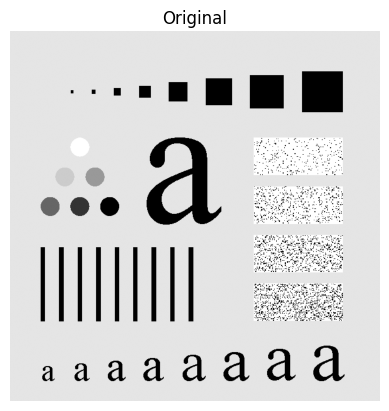

In [2]:
img = cv2.imread("Imagenes/Fig0448(a)(characters_test_pattern).tif", cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

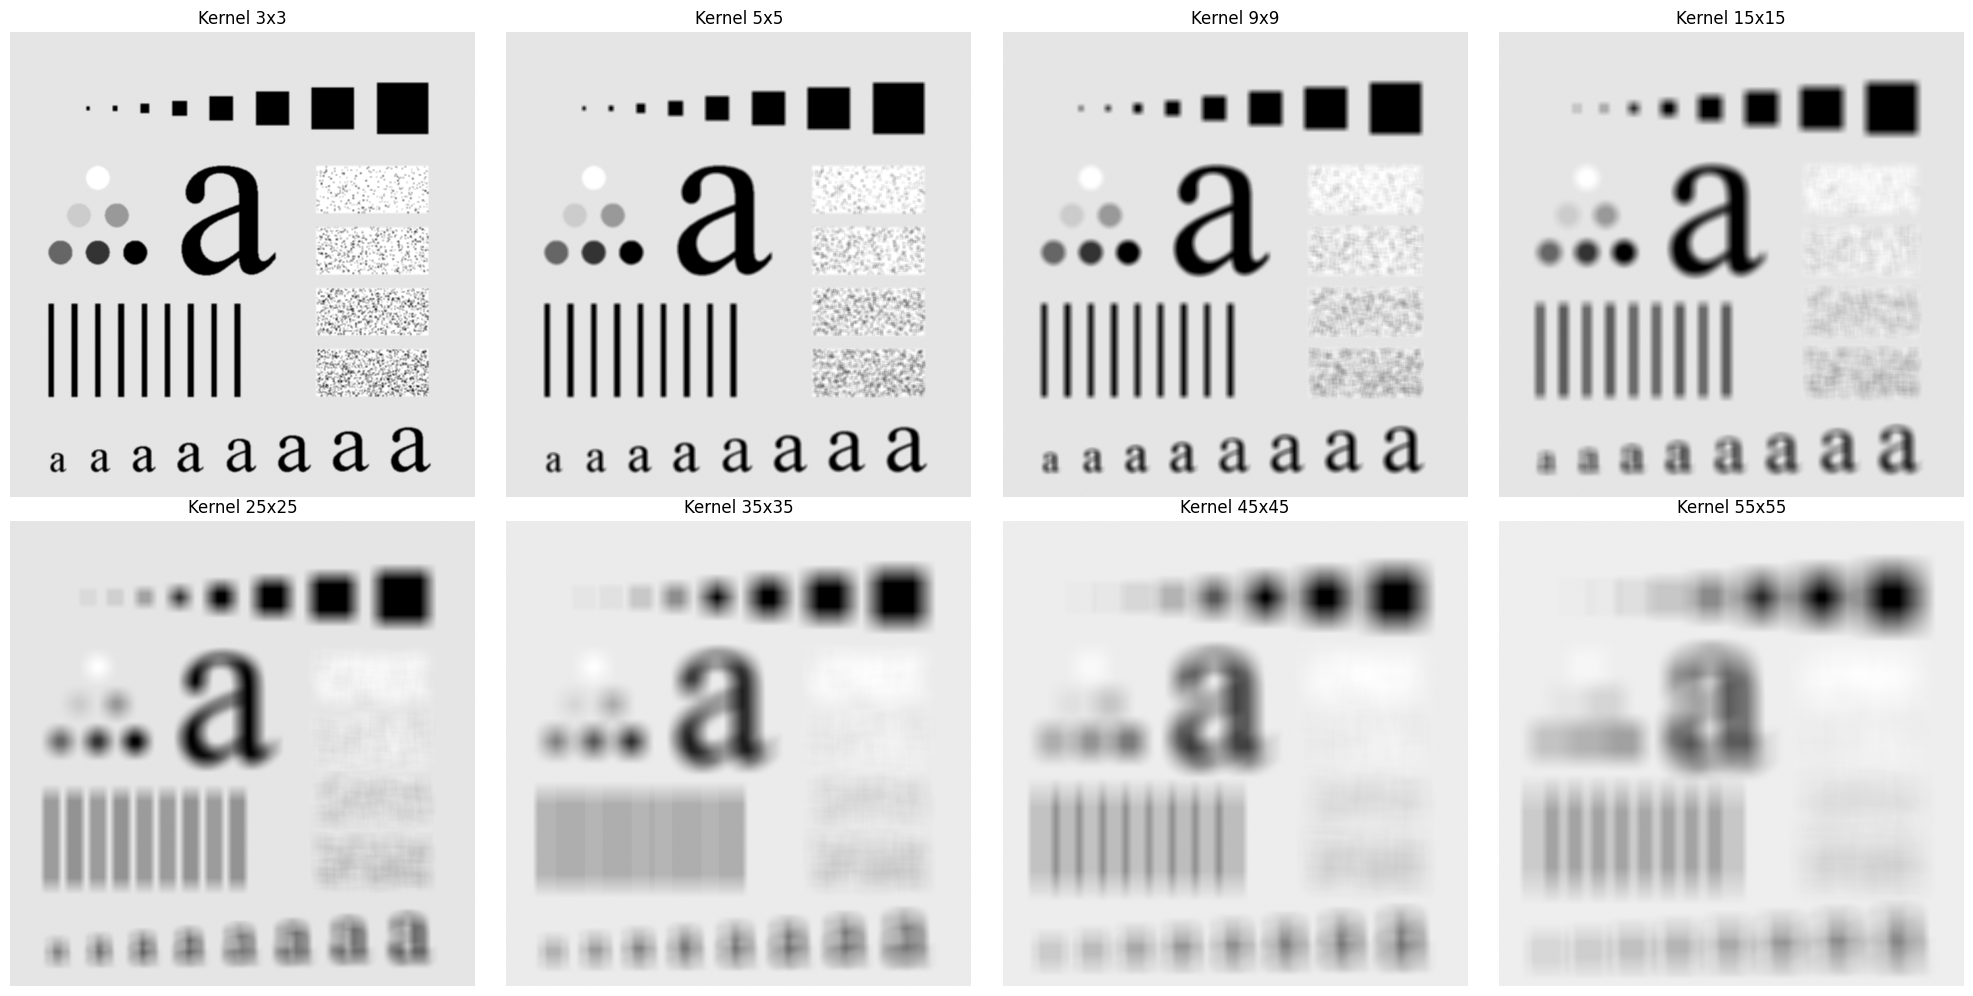

In [3]:
def create_kernel(dim):
    # Crea un kernel cuadrado de tamaño dim x dim donde cada celda tiene valor 1/(dim²)
    value = 1.0 / (dim * dim)
    kernel = np.full((dim, dim), value, dtype=np.float32)
    return kernel

n = [3,5,9,15,25,35,45,55]
filtered_imgs = []
for dim in n:
    kernel = create_kernel(dim)
    filtered = cv2.filter2D(img, -1, kernel)
    filtered_imgs.append((dim, filtered))

# Mostrar todos los resultados
plt.figure(figsize=(20, 10))
for i, (dim, filtered) in enumerate(filtered_imgs):
    plt.subplot(2, 4, i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Kernel {dim}x{dim}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def manual_filter(img, kernel):
    kh, kw = kernel.shape
    pad_h = kh // 2
    pad_w = kw // 2
    # Padding para bordes
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    filtered = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+kh, j:j+kw]
            filtered[i, j] = np.sum(region * kernel)
    return filtered.astype(img.dtype)

filtered_images = []
for dim in n:
    kernel = create_kernel(dim)
    filtered = manual_filter(img, kernel)
    filtered_imgs.append((dim, filtered))

plt.figure(figsize=(20, 10))
for i, (dim, filtered) in enumerate(filtered_imgs):
    plt.subplot(2, 4, i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Kernel {dim}x{dim}')
    plt.axis('off')
plt.tight_layout()
plt.show()